# Homework 3 - Eigenface for face recognition

## (a) Download The Face Dataset and unzip faces.zip
Completed.
## (b) Load the training set into a matrix X

In [1]:
# import packages
import numpy as np
# from scipy import misc
from imageio import imread
from matplotlib import pylab as plt
import matplotlib.cm as cm
from sklearn.linear_model import LogisticRegression
%matplotlib inline

# Load the training set into a matrix X
train_labels, train_data = [], []
for line in open('./faces/train.txt'):
    im = imread(line.strip().split()[0])
    train_data.append(im.reshape(2500,))
    train_labels.append(line.strip().split()[1])
train_data, train_labels = np.array(train_data, dtype=float), np.array(train_labels, dtype=int)

# Load the test set into a matrix X
test_labels, test_data = [], []
for line in open('./faces/test.txt'):
    im = imread(line.strip().split()[0])
    test_data.append(im.reshape(2500,))
    test_labels.append(line.strip().split()[1])
test_data, test_labels = np.array(test_data, dtype=float), np.array(test_labels, dtype=int)

# inspect data
print(train_data.shape, train_labels.shape)
print(test_data.shape, test_labels.shape)

(540, 2500) (540,)
(100, 2500) (100,)


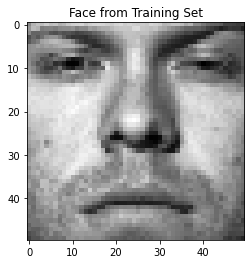

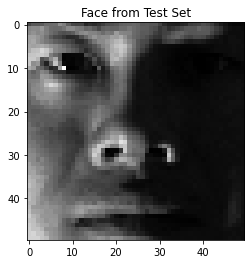

In [2]:
# Training set - Pick a face image from X and display that image in grayscale
plt.imshow(train_data[10, :].reshape(50,50), cmap = cm.Greys_r)
plt.title('Face from Training Set')
plt.savefig("face_train_set") # save pics
plt.show()

# Test set - Pick a face image from X and display that image in grayscale
plt.imshow(test_data[10, :].reshape(50,50), cmap = cm.Greys_r)
plt.title('Face from Test Set')
plt.savefig("face_test_set") # save pics
plt.show()

## (c) Average Face

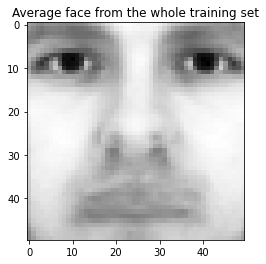

[59.25185185 56.10185185 52.42222222 ... 67.22222222 64.61851852
 59.27592593]


In [8]:
# Compute the average face µ from the whole training set 
# by summing up every row in X then dividing by the number of faces
avg_face = np.mean(train_data, axis=0)
# Display the average face as a grayscale image
plt.imshow(avg_face.reshape(50,50), cmap = cm.Greys_r)
plt.title('Average face from the whole training set')
plt.savefig("average_face_train_set") # save pics
plt.show()
# print mu
# output is [59.25185185 56.10185185 52.42222222 ... 67.22222222 64.61851852 59.27592593]
print(avg_face)

## (d) Mean Subtraction

[[-54.25185185 -49.10185185 -45.42222222 ... -54.22222222 -44.61851852
  -28.27592593]
 [  5.74814815  17.89814815  21.57777778 ...  43.77777778  41.38148148
   36.72407407]
 [ 41.74814815  59.89814815  77.57777778 ...  -6.22222222 -12.61851852
  -18.27592593]
 ...
 [ 47.74814815  58.89814815  55.57777778 ... -41.22222222 -41.61851852
  -35.27592593]
 [195.74814815 198.89814815 202.57777778 ... -45.22222222 -42.61851852
  -37.27592593]
 [114.74814815 121.89814815 149.57777778 ... -39.22222222 -38.61851852
  -31.27592593]]
[[ 47.74814815  56.89814815  74.57777778 ... -30.22222222 -26.61851852
  -37.27592593]
 [ 51.74814815  81.89814815 100.57777778 ... -37.22222222 -39.61851852
  -37.27592593]
 [ 51.74814815  49.89814815   5.57777778 ... -55.22222222 -49.61851852
  -48.27592593]
 ...
 [-49.25185185 -45.10185185 -41.42222222 ... 109.77777778 122.38148148
  109.72407407]
 [ 76.74814815  54.89814815  53.57777778 ... -50.22222222 -46.61851852
  -42.27592593]
 [ -8.25185185 -20.10185185 -20.

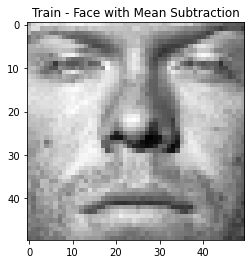

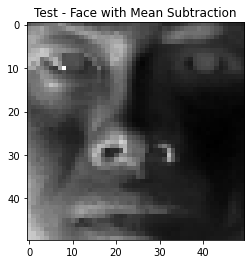

In [9]:
# Subtract average face µ from every row in X. 
train_ms = train_data - avg_face
test_ms = test_data - avg_face
# print train_ms and test_ms
print(train_ms)
print(test_ms)
# Train - Pick a face image after mean subtraction from the new X and display that image in grayscale
plt.imshow(train_ms[10,:].reshape(50,50), cmap = cm.Greys_r)
plt.title("Train - Face with Mean Subtraction")
plt.savefig("train_mean_sub") # save pics
plt.show()
# Test - Pick a face image after mean subtraction from the new X and display that image in grayscale
plt.imshow(test_ms[10,:].reshape(50,50), cmap = cm.Greys_r)
plt.title("Test - Face with Mean Subtraction")
plt.savefig("test_mean_sub") # save pics
plt.show()

## (e) Eigenface

[[-0.01336673 -0.01283069 -0.01241531 ... -0.01659463 -0.01558098
  -0.01407425]
 [-0.02607382 -0.02333211 -0.02096829 ...  0.02491938  0.02482487
   0.02352567]
 [-0.02873179 -0.02435197 -0.01957722 ...  0.00635426  0.00322897
   0.00104641]
 ...
 [-0.02592006  0.03610168  0.00660958 ... -0.01919404 -0.00545454
   0.02230863]
 [ 0.00246863  0.00517997  0.005463   ... -0.00445761 -0.00819364
  -0.0134359 ]
 [ 0.00519271 -0.00153372  0.00305048 ...  0.00038555  0.01268042
   0.05058161]]


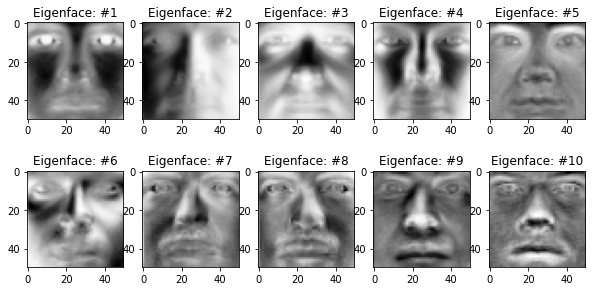

In [16]:
# Perform eigendecomposition 
from numpy.linalg import svd
U, S, V = svd(train_data, full_matrices=False)
# ouput is (540, 540) (540,) (540, 2500)
# print(U.shape, S.shape, V.shape)
print(V)

# Display the first 10 eigenfaces as 10 images in grayscale
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(V[i,:].reshape(50,50), cmap = cm.Greys_r)
    plt.title('Eigenface: #%d' % (i+1))
plt.savefig("first_10_eigenfaces") # save pics
plt.show()

## (f) Eigenface Feature

In [15]:
# Write a function to generate r-dimensional feature matrix F and Ftest 
# for training images X and test images Xtest, respectively
def get_eigenface_feature(r):
    V_T_R = V[:r,:].T
    F = np.dot(train_ms, V_T_R)
    F_test = np.dot(test_ms, V_T_R)
    return (F, F_test)

## (g) Face Recognition

In [10]:
# Extract training and test features for r = 10
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(multi_class="ovr", max_iter = int(1e4))

F, F_test = get_eigenface_feature(10)
model.fit(F, train_labels)
print ("Accuracy score for r = 10 is: " + str(model.score(F_test, test_labels)))
print (F, F_test)

Accuracy score for r = 10 is: 0.8
[[ 3071.98503336   440.55436121   127.39265075 ...  -178.04529608
    119.05731126    30.29017967]
 [-2197.05744965   760.60052365   562.46174352 ...  -182.9450855
   -113.96838521  -384.43352369]
 [-2473.33262159  -163.06716256  -608.22806399 ...    85.3894248
    584.65403477  -325.92945615]
 ...
 [-1841.10091761 -1907.14587095   226.44323    ...   -51.07709295
    -33.22865825    26.8049682 ]
 [ 2586.30249394  -163.15381029   151.68973865 ...   265.28513326
   -144.82934451  -105.81505369]
 [-1363.71276667 -2930.60526623 -1287.14464964 ...  -311.35304262
   -162.68186295  -198.41107223]] [[-1.97547669e+03 -5.30835552e+01 -1.56924329e+03 -1.80272248e+00
  -8.32099016e+01  3.14103292e+01  2.40990762e+02  1.64718083e+02
   8.34103348e+02 -1.85326815e+02]
 [-6.99288660e+02 -1.78444521e+03  8.83082635e+02 -2.25056407e+02
  -1.48074873e+01 -2.01002918e+02  1.46643128e+02 -3.35192380e+02
  -1.16748467e+02 -3.78608774e+02]
 [ 2.89306329e+03 -3.42858431e+01 

In [11]:
# Train a Logistic Regression model using F and test on F test
x, y = [], []
for r in range(1, 201):
    F, F_test = get_eigenface_feature(r)
    model.fit(F, train_labels)
    x.append(r)
    y.append(model.score(F_test, test_labels))

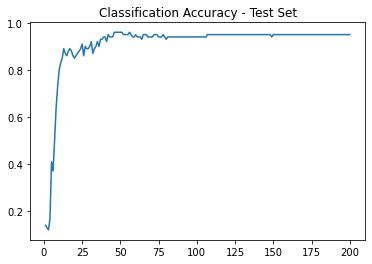

In [12]:
# Report the classification accuracy on the test set
plt.plot(x, y)
plt.savefig("classification_accuracy") # save pics
plt.title('Classification Accuracy - Test Set')
plt.show()